# Performance programming

We've spent most of this course looking at how to make code readable and reliable. For research work, it is often also important that code is efficient: that it does what it needs to do *quickly*.

It is very hard to work out beforehand whether code will be efficient or not: it is essential to *Profile* code, to measure its performance, to determine what aspects of it are slow.

When we looked at Functional programming, we claimed that code which is conceptualised in terms of actions on whole data-sets rather than individual elements is more efficient. Let's measure the performance of some different ways of implementing some code and see how they perform.

## Two Mandelbrots

You're probably familiar with a famous fractal called the [Mandelbrot Set](https://www.youtube.com/watch?v=AGUlJus5kpY).

For a complex number $c$, $c$ is in the Mandelbrot set if the series $z_{i+1}=z_{i}^2+c$ (With $z_0=c$) stays close to $0$.
Traditionally, we plot a color showing how many steps are needed for $\left|z_i\right|>2$, whereupon we are sure the series will diverge.

Here's a trivial python implementation:

In [1]:
def mandel1(position, limit=50):
    
    value=position
    
    while abs(value)<2:
        limit-=1
        
        value=value**2+position
        
        if limit<0:
            return 0
        
    return limit

In [2]:
xmin=-1.5
ymin=-1.0
xmax=0.5
ymax=1.0
resolution=300
xstep=(xmax-xmin)/resolution
ystep=(ymax-ymin)/resolution
xs=[(xmin+(xmax-xmin)*i/resolution) for i in range(resolution)]
ys=[(ymin+(ymax-ymin)*i/resolution) for i in range(resolution)]

In [3]:
%%timeit
data=[[mandel1(complex(x,y)) for x in xs] for y in ys]

1 loops, best of 3: 518 ms per loop


In [4]:
data1=[[mandel1(complex(x,y)) for x in xs] for y in ys]

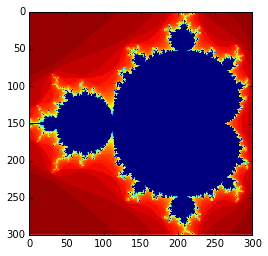

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(data1,interpolation='none')

We will learn this lesson how to make a version of this code which works Ten Times faster:

In [6]:
import numpy as np
def mandel_numpy(position,limit=50):
    value=position
    diverged_at_count=np.zeros(position.shape)
    while limit>0:
        limit-=1
        value=value**2+position
        diverging=value*np.conj(value)>4
        first_diverged_this_time=np.logical_and(diverging, diverged_at_count==0)
        diverged_at_count[first_diverged_this_time]=limit
        value[diverging]=2
        
    return diverged_at_count

In [ ]:
ymatrix,xmatrix=np.mgrid[ymin:ymax:ystep,xmin:xmax:xstep]

In [11]:
values=xmatrix + 1j*ymatrix

In [12]:
data_numpy=mandel_numpy(values)

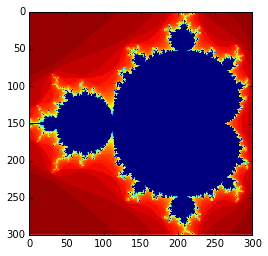

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(data_numpy,interpolation='none')

In [9]:
%%timeit
data_numpy=mandel_numpy(values)

10 loops, best of 3: 77.9 ms per loop


Note we get the same answer:

In [10]:
sum(sum(abs(data_numpy-data1)))

0.0